# Intro to NLP Lab: Tokenization and Vocabulary Size vs Sequence Length

Welcome to this lab assignment on **tokenization**! Tokenization is the process of breaking text up into smaller units (tokens) that can be processed by a computer. In this lab, you'll implement and compare four tokenization strategies — **character-level**, **word-level**, **phrase-level (using bigrams)**, and **subword tokenization using Byte-Pair Encoding (BPE)** — and explore how each approach affects the size of the vocabulary and the length of tokenized sequences.

By the end of this lab you should be able to:

- Implement simple character- and word-level tokenizers.
- Compute bigram frequencies and implement a phrase-level tokenizer that merges common bigrams.
- Implement a basic Byte-Pair Encoding (BPE) algorithm for subword tokenization.
- Measure and visualize how different tokenization strategies trade off vocabulary size and sequence length.
- Reflect on why naive whitespace tokenization is often insufficient.

The entire lab should take about **1–2 hours** to complete. Have fun!


## Sample Text

For this lab we'll use a longer excerpt from *Alice's Adventures in Wonderland* (Chapter 1) as our corpus. The excerpt is provided in the file `sample_text.txt` in the lab directory. The text is adapted from the public domain version of the story【949699819888551†L4-L84】.

**Please do not modify the contents of this file.**


## 1. Preprocessing

Before tokenizing, we'll do a minimal amount of preprocessing. We will:

- Convert the text to lowercase so that `Alice` and `alice` become the same token.
- Replace newline characters (`
`) with spaces so that the corpus forms one continuous sequence of tokens.
- Leave punctuation intact (punctuation will remain attached to the nearest word) for simplicity.

### Task 1

Implement a function `preprocess_text(text: str) -> str` that performs these steps and returns the cleaned text. A few examples are given in the docstring. Do **not** perform any other preprocessing (e.g. do **not** strip punctuation or collapse multiple spaces).


In [1]:
def preprocess_text(text: str) -> str:
    """Preprocess the input text by lowercasing and replacing newlines with spaces.

    Parameters
    ----------
    text : str
        Raw text from the corpus, potentially containing newlines.

    Returns
    -------
    str
        A cleaned, lowercase string with newlines replaced by single spaces.

    Examples
    --------
    >>> preprocess_text('Hello\nWorld!')
    'hello world!'
    >>> preprocess_text('A\nB\nC')
    'a b c'
    """
    # TODO: implement preprocessing (lowercase and replace newlines with spaces)
    return text.replace("\n", " ").lower()

#preprocess_text("asd12321 \n \n asdasdasd qw QOWEIQDJA")


## 2. Character-Level Tokenization

In a character-level tokenizer, each character becomes its own token. Spaces and punctuation are treated as individual tokens as well. This strategy yields the **smallest vocabulary** (all possible characters that appear in the corpus) but produces **very long sequences** because every character is a separate token.

### Task 2

Implement a function `char_tokenize(text: str) -> list[str]` that converts the input string into a list of characters. Your function should **not** strip spaces or punctuation; simply return a list containing each character in order.

For example:

```python
>>> char_tokenize('abc')
['a', 'b', 'c']
>>> char_tokenize('a b')
['a', ' ', 'b']
```


In [ ]:
def char_tokenize(text: str) -> list[str]:
    """Tokenize the input string into individual characters.

    Parameters
    ----------
    text : str
        A preprocessed string (lowercase with spaces instead of newlines).

    Returns
    -------
    list[str]
        A list of characters, including spaces and punctuation.

    Examples
    --------
    >>> char_tokenize('abc')
    ['a', 'b', 'c']
    >>> char_tokenize('a b')
    ['a', ' ', 'b']
    """
    # TODO: implement character-level tokenization
    return list(preprocess_text(text))
#print(char_tokenize("ASDIQOWJDIAnsodianndoA1023913 AsDOI"))

['a', 's', 'd', 'i', 'q', 'o', 'w', 'j', 'd', 'i', 'a', 'n', 's', 'o', 'd', 'i', 'a', 'n', 'n', 'd', 'o', 'a', '1', '0', '2', '3', '9', '1', '3', ' ', 'a', 's', 'd', 'o', 'i']


## 3. Word-Level Tokenization

The simplest word tokenizer splits a string on whitespace characters. This strategy treats each word (separated by spaces) as a token and keeps punctuation attached to the nearest word. While easy to implement, it often results in a **very large vocabulary** because every inflected form (e.g. `rabbits` vs. `rabbit`) is considered a separate token.

### Task 3

Implement a function `word_tokenize(text: str) -> list[str]` that splits the input string on whitespace. Your function should preserve punctuation attached to words (e.g. `Rabbit!` should remain `Rabbit!`). Do **not** perform any additional preprocessing here; the input will already be cleaned by `preprocess_text`.


In [104]:
def word_tokenize(text: str) -> list[str]:
    """Tokenize the input string on whitespace.

    Parameters
    ----------
    text : str
        A preprocessed string with lowercase letters and spaces.

    Returns
    -------
    list[str]
        A list of word tokens.

    Examples
    --------
    >>> word_tokenize('hello world!')
    ['hello', 'world!']
    >>> word_tokenize('multiple   spaces here')
    ['multiple', 'spaces', 'here']
    """
    # TODO: implement word-level tokenization
    word = text.split()
    
    while "" in word:
        word.remove("")
    return word

#print(word_tokenize("\n asDaSd \n   qwe asd8 128339 asdh218"))

## 4. Phrase-Level Tokenization via Bigrams

A phrase-level tokenizer can merge frequently occurring bigrams (pairs of adjacent words) into single tokens. For example, the phrase `white rabbit` appears multiple times in our sample text; treating it as a single token `white_rabbit` can reduce sequence length but increases the vocabulary size.

To implement this, we'll first compute a frequency dictionary of all bigrams in the corpus. Then we'll select the top *N* bigrams (we'll use **5** in this lab) and merge those pairs everywhere they occur.

### Task 4

1. Implement a function `compute_bigram_frequencies(tokens: list[str]) -> dict[tuple[str,str], int]` that returns a dictionary mapping each consecutive token pair to its frequency in the list.
2. Implement a function `phrase_tokenize(tokens: list[str], bigrams: list[tuple[str,str]]) -> list[str]` that merges any bigram in `bigrams` into a single token joined by an underscore (e.g. `('white','rabbit')` becomes `'white_rabbit'`). Your function should scan through the token list from left to right, merging greedily when a listed bigram is found.

Hints:
- Use a loop to walk through the tokens. When you see a bigram to merge, append the merged token and skip the next word.
- Otherwise, append the current token and move on.


In [ ]:

def compute_bigram_frequencies(tokens: list[str]) -> dict[tuple[str, str], int]:
    """Compute frequencies of adjacent token pairs.

    Parameters
    ----------
    tokens : list[str]
        A list of tokens (words) from the corpus.

    Returns
    -------
    dict[tuple[str,str], int]
        A dictionary mapping each bigram (pair of tokens) to its count.
    """
    # TODO: implement bigram frequency counting
    corpus_seen = {}
    for i in range(len(tokens) - 1):
        bigram = tuple([tokens[i], tokens[i + 1]])
        if bigram in corpus_seen:
            corpus_seen[bigram] += 1
        else:
            corpus_seen[bigram] = 1
    return corpus_seen


def phrase_tokenize(tokens: list[str], bigrams: list[tuple[str, str]]) -> list[str]:
    """Merge selected bigrams into single phrase tokens.

    Parameters
    ----------
    tokens : list[str]
        A list of word tokens.
    bigrams : list[tuple[str,str]]
        A list of bigrams (tuples of two tokens) to merge.

    Returns
    -------
    list[str]
        The token list with specified bigrams merged into single tokens joined by an underscore.
    """
    # TODO: implement phrase-level tokenization using the provided bigrams    
    merged = []
    i = 0

    while i < len(tokens) - 1:
        bigram = tuple([tokens[i], tokens[i + 1]])
        if bigram in bigrams:  
            merged.append(tokens[i] + "_" + tokens[i + 1])
            i += 2
        else:
            merged.append(tokens[i])
            i += 1
            
    if i == len(tokens) - 1:
        merged.append(tokens[i])
    return merged

#print(compute_bigram_frequencies(['apple', 'apple','apple', 'apple']))   
#print(phrase_tokenize(['the','white','rabbit','ran'], [('white','rabbit')]))

## 5. Subword Tokenization via Byte-Pair Encoding (BPE)

BPE is an unsupervised algorithm that gradually merges the most frequent pairs of symbols in a corpus until a desired vocabulary size is reached. In the context of tokenization, we treat each **word** as a sequence of characters plus a special end-of-word symbol `</w>`. At each iteration, we:

1. Count the frequency of all adjacent symbol pairs (e.g. `('a', 'l')` in `alice</w>`).
2. Find the most frequent pair and merge it everywhere in the corpus.
3. Add this merged pair to our list of merges.

After `num_merges` iterations, the learned merges define a subword vocabulary. To encode a new word, we repeatedly apply the merges from longest to shortest: the longest possible merged pairs are replaced first.

This algorithm allows rare words to be represented as sequences of subword units, enabling the model to handle out-of-vocabulary words gracefully.

### Task 5

1. Implement a function `bpe_train(corpus: list[str], num_merges: int) -> list[tuple[str, str]]` that trains a BPE tokenizer on a list of word tokens (the **full corpus**, not just unique words). It should return the list of merges in the order they were applied.
2. Implement a function `bpe_encode(word: str, merges: list[tuple[str, str]]) -> list[str]` that encodes a single word into a list of subword tokens by repeatedly applying the learned merges. Remember to remove the end-of-word symbol in the final output.

Hints:
- Represent each word as a list of characters followed by `</w>` during training and encoding.
- At each merge step, replace occurrences of the target pair with their concatenation.
- During encoding, apply merges sequentially in the order learned during training.


In [105]:
def bpe_train(corpus: list[str], num_merges: int) -> list[tuple[str, str]]:
    """Train a simple BPE tokenizer.

    Parameters
    ----------
    corpus : list[str]
        A list of word tokens in the corpus. Each word will be represented as a list of characters plus an end-of-word symbol during training.
    num_merges : int
        The number of pair merges to perform.

    Returns
    -------
    list[tuple[str, str]]
        The list of merged symbol pairs in the order they were applied.
    """
    # TODO: implement BPE training on the full corpus
    new_corpus = []

    for i in corpus: 
        new_corpus.append(list(i) + ['</w>'])

    for i in range(num_merges):
        count = {}
        for char in new_corpus:
            for j in range(len(char) - 1):
                pair = (char[j], char[j + 1])
                if pair in count:
                    count[pair] += 1
                else:
                    count[pair] = 1
    return new_corpus

#simple_corpus = ['low','lowest','newest','wider']
#merges_test = bpe_train(simple_corpus, num_merges=10)
#print(merges_test)

def bpe_encode(word: str, merges: list[tuple[str, str]]) -> list[str]:
    """Encode a single word using a trained BPE tokenizer.

    Parameters
    ----------
    word : str
        A word to encode.
    merges : list[tuple[str, str]]
        The list of merges learned during BPE training.

    Returns
    -------
    list[str]
        A list of subword tokens representing the input word. The end-of-word symbol should **not** appear in the returned list.
    """
    # TODO: implement BPE encoding using the provided merges
    token = list(word)
    for char in merges:
        i = 0
        merged = []
        while i < len(token):
            if (i < len(token) - 1) and (token[i], token[i + 1]) == char:
                merged.append(token[i] + token[i + 1])
                i += 2
            else:
                merged.append(token[i])
                i += 1
        token = merged
    return token

#bpe_encode(word: str, merges: list[tuple[str, str]]
#encoded = bpe_encode('lowest', [('l','o'),('lo','w'),('e','s'),('es','t')])
#print(encoded)

## 6. Evaluation

With your four tokenizers defined, it's time to evaluate them. We'll measure two simple statistics:

- **Vocabulary size:** the number of unique tokens produced by each tokenizer.
- **Average sequence length:** the average number of tokens per sentence in the corpus.

### Task 6

1. Read in `sample_text.txt` and run `preprocess_text` on it.
2. Tokenize the cleaned text using `char_tokenize`, `word_tokenize`, `phrase_tokenize` and your BPE tokenizer. For phrase-level tokenization, compute bigram frequencies, select the top **5** most frequent bigrams, and merge them. For BPE, train on the **full list of word tokens** with `num_merges=50` and then encode every word in the corpus.
3. Compute the vocabulary size and average sequence length (number of tokens divided by number of sentences) for each tokenizer. Use the period `'.'` as a simple sentence delimiter. If the corpus contains no periods, treat it as one sentence.
4. Print out the results and create a scatter plot of vocabulary size vs. average sequence length. Label each point with the tokenizer name.


Counter({('of', 'the'): 7, ('as', 'she'): 6, ('she', 'was'): 5, ('i', 'shall'): 5, ('there', 'was'): 4, ('to', 'her'): 4, ('that', 'she'): 4, ('it', 'was'): 4, ('to', 'get'): 3, ('she', 'had'): 3, ('out', 'of'): 3, ('it,', 'and'): 3, ('down', 'a'): 3, ('in', 'the'): 3, ('cats', 'eat'): 3, ('her', 'sister'): 2, ('but', 'it'): 2, ('had', 'no'): 2, ('pictures', 'or'): 2, ('`and', 'what'): 2, ('thought', 'alice'): 2, ('in', 'her'): 2, ('would', 'be'): 2, ('rabbit', 'with'): 2, ('was', 'nothing'): 2, ('so', 'very'): 2, ('very', 'much'): 2, ('the', 'rabbit'): 2, ('dear!', 'i'): 2, ('at', 'the'): 2, ('a', 'watch'): 2, ('looked', 'at'): 2, ('and', 'then'): 2, ('after', 'it,'): 2, ('to', 'see'): 2, ('see', 'it'): 2, ('like', 'a'): 2, ('alice', 'had'): 2, ('not', 'a'): 2, ('a', 'very'): 2, ('was', 'very'): 2, ('she', 'fell'): 2, ('to', 'look'): 2, ('wonder', 'what'): 2, ('she', 'tried'): 2, ('tried', 'to'): 2, ('they', 'were'): 2, ('one', 'of'): 2, ('to', 'herself,'): 2, ('think', 'me'): 2, ('if

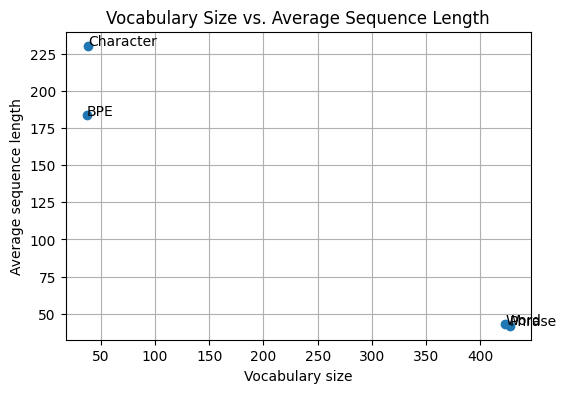

In [106]:
from collections import Counter
import matplotlib.pyplot as plt

# 1. Load and preprocess the corpus
with open('sample_text.txt', 'r', encoding='utf-8') as f:
    sample_text = f.read()
clean_text = preprocess_text(sample_text)

# Compute the number of sentences (use period as delimiter)
num_sentences = clean_text.count('.') if clean_text.count('.') > 0 else 1

# 2. Tokenize using the different strategies
char_tokens = char_tokenize(clean_text) 
word_tokens = word_tokenize(clean_text)

# Phrase-level tokenization
bigram_freqs = compute_bigram_frequencies(word_tokens)
# Select the top 5 bigrams by frequency
bigram_counter = Counter(bigram_freqs)
print(bigram_counter)
top_bigrams = [bigram for bigram, _ in bigram_counter.most_common(5)]
print(top_bigrams)
phrase_tokens = phrase_tokenize(word_tokens, top_bigrams)

# BPE-level tokenization
# Train BPE on the full list of word tokens
merges = bpe_train(word_tokens, 50)
bpe_tokens_corpus = []
for w in word_tokens:
    bpe_tokens_corpus.extend(bpe_encode(w, merges))

# 3. Compute metrics
# Vocabulary sizes
char_vocab_size = len(set(char_tokens))
word_vocab_size = len(set(word_tokens))
phrase_vocab_size = len(set(phrase_tokens))
bpe_vocab_size = len(set(bpe_tokens_corpus))

# Average sequence lengths
avg_char_length = len(char_tokens) / num_sentences
avg_word_length = len(word_tokens) / num_sentences
avg_phrase_length = len(phrase_tokens) / num_sentences
avg_bpe_length = len(bpe_tokens_corpus) / num_sentences

# Print results
print('Character tokenizer: vocab size =', char_vocab_size, ', avg sequence length =', avg_char_length)
print('Word tokenizer: vocab size =', word_vocab_size, ', avg sequence length =', avg_word_length)
print('Phrase tokenizer: vocab size =', phrase_vocab_size, ', avg sequence length =', avg_phrase_length)
print('BPE tokenizer: vocab size =', bpe_vocab_size, ', avg sequence length =', avg_bpe_length)

# 4. Visualization
labels = ['Character', 'Word', 'Phrase', 'BPE']
vocab_sizes = [char_vocab_size, word_vocab_size, phrase_vocab_size, bpe_vocab_size]
avg_lengths = [avg_char_length, avg_word_length, avg_phrase_length, avg_bpe_length]

plt.figure(figsize=(6,4))
plt.scatter(vocab_sizes, avg_lengths)
for i, label in enumerate(labels):
    plt.annotate(label, (vocab_sizes[i], avg_lengths[i]))
plt.title('Vocabulary Size vs. Average Sequence Length')
plt.xlabel('Vocabulary size')
plt.ylabel('Average sequence length')
plt.grid(True)
plt.show()


## 7. Reflection

In a few sentences, discuss the trade‑offs you observed between vocabulary size and sequence length for the four tokenization strategies. Why might one prefer a subword tokenizer (like BPE) over purely character‑ or word‑level tokenization? How does phrase‑level tokenization compare? Your answer should be at least a few sentences long.


There are a lot of differences between the vocabulary size and the sequence size. The vocabulary for our character tokenizer was the lowest at 38, but the sequence length is also the largest at around 230. The word and phrase tokenizer had similar vocabulary sizes and similar sequence lengths. Where BPE has a relatively small vocabulary size and a moderate sequence length. BPE seems to balance the vocabulary size and sequence length. Phrase level tokenization performed almost identically to the word tokenizer which both have the smallest sequence length and highest vocabulary size.

Character tokenizer: vocab size = 38 , avg sequence length = 230.3181818181818

Word tokenizer: vocab size = 423 , avg sequence length = 43.22727272727273

Phrase tokenizer: vocab size = 427 , avg sequence length = 42.0

BPE tokenizer: vocab size = 59 , avg sequence length = 143.95454545454547

In [107]:
# ------------------------------------------------------------------------------
# Hidden tests (autograder)
# These tests will be used by the grading script to evaluate your solutions.
# Do not modify this cell! If you do, you may receive zero credit.
# ------------------------------------------------------------------------------

# Test preprocess_text
assert preprocess_text('Hello\nWorld!') == 'hello world!'
assert preprocess_text('A\nB\nC') == 'a b c'

# Test char_tokenize
assert char_tokenize('abc') == ['a','b','c']
assert char_tokenize('a b') == ['a',' ','b']

# Test word_tokenize
assert word_tokenize('hello world!') == ['hello','world!']
assert word_tokenize('multiple   spaces here') == ['multiple','spaces','here']

# Test compute_bigram_frequencies
bigrams_test = compute_bigram_frequencies(['the','cat','sat','on','the','mat'])
assert bigrams_test.get(('the','cat'),0) == 1 and bigrams_test.get(('cat','sat'),0) == 1

# Test phrase_tokenize
phrase_test = phrase_tokenize(['the','white','rabbit','ran'], [('white','rabbit')])
assert phrase_test == ['the','white_rabbit','ran']

# Test BPE training on a tiny corpus
simple_corpus = ['low','lowest','newest','wider']
merges_test = bpe_train(simple_corpus, num_merges=10)
# The first merge in standard BPE for this corpus should be ('e','s') or ('l','o'), depending on frequency ties.
assert ('l','o') in merges_test or ('e','s') in merges_test

# Test BPE encoding on a simple word
encoded = bpe_encode('lowest', [('l','o'),('lo','w'),('e','s'),('es','t')])
assert isinstance(encoded, list) and len(encoded) > 0


print('All preliminary tests passed!')


AssertionError: 